# DL by NYU




## DL for NLP - 1

https://www.youtube.com/watch?v=6D4EWKJgNn0
https://atcold.github.io/pytorch-Deep-Learning/

00:00:00

### Intro


High view on how DL used in NLP. 

Great progress over last years. This wasn't expected. 

*Language Models*

Example from GPT-2 about unicorns. This was shoking at the time: details, grammar, etc. There are flaws but looks amazing.

Language model - density estimation of a text. Prob on every string. (They we can predict next sentence or word.) How model density? Factorize distribution using chain rule: 

$$p(x_0, \dots, x_n) = p(x_0) p(x_1 | x_0) p(x_2 | x_1 , x_0) \dots$$  

So we want to turn factorization problem into classification problem: given words predict the next word. Then there are a lot of those classification problems! For each position. 

Natural language models. 
At high level this is always like we are given many words, we move them into a vector. We output probabilities of next words that the model knows of. And we train model to max likelihood. So this requires an encoder.

Context encoder. How to build this? 

*ConvNetc* First approach - convnets. It maps into a vector. Then applies 1d conv at each timestep (for each word). It had fixed length context (a flaw). This worked fast. Downside was the output was dependent on receiptive field (example 'unicord' depends on 5 words only). But large text has long dependencies, i.e. books (title there is hundreds of words distant). 

*RNN* Another approch. RNN. Concept: at every timestep we have state which is a combined words we've read so far. We combine with current word and output probabilities. Natural model - we do reading like this, i.e. we read from left to right and maintain some state as we read. In principle we could bound here unbounded context. In practice issues were no free lunches , we needed to to have huge amount of info into single vectore. And also there were practical issues: vanishing gradient, exponensially smaller. RNN they are slow, reason is they to get output you need to build state for every previous word. So no parallel but only sync. 

So ConvNets could do parallel and they are quick but this receiptive field limittation. And RNN were slow.

0:13:48

### Transformer language model

*Transformer* Introduced 2017 in All You need is Attention. The paper had this figure of transformer. 

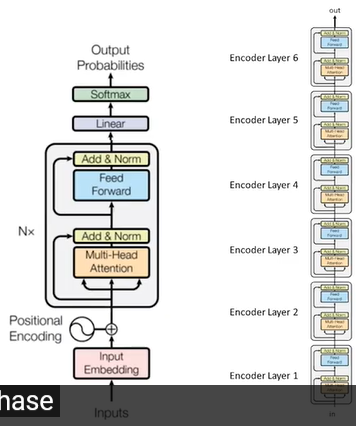

At the bottom - input. In center it is 6 transformer blocks ('Nx'). Original paper had 6 of those. Now there are a lot of layers now. 

In detail, the transformer block:

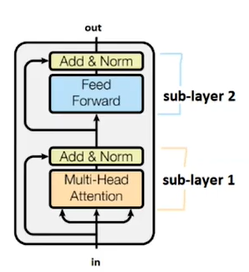

It has 2 sublayers. Both important. 'Multi-head attention' is the key. FF - is straightforward. 'Add & Norm ' - residual connection and layer normalization.

Q: why layer normalization? Rather than group or batch norm. A: it depends on practice, empirecal. In practice it is unclear why but it works.

Q: Do they share weights at everytime step? A: Yes, like in convnets. 

Multi-head attention:

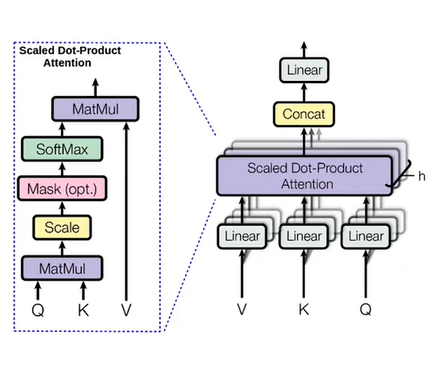

Q - query
K - key
V - values

So we compute keys, queries and values from words. Consider some position in text like in example 'These horned silver-white ..', where '..' is for unicorns, the word we are trying to predict. Now keys $k$ are computed from context words. Query $q$ is computed for the unicorn word. Keys and values computed for each word. A key can be some info about a word: is it adjective or verb, etc. A query also contains such info. 

With q computed we can calculate distribution of previous words: $p_i = softmax(q, k_i)$. (It is attention weights.) It is attention distribution. Query can be: 'tell me what distribution of previous adjectives is.

Values $v_i$ are concrete values of what a word is. And hidden state will be $h_i = \sum_i p_i v_i$. 

This is a sclaed Dot-Product Attention (see the diagram above). We do this many times in parallel. 

What's intuition behind this? In the example above, about unicorns. This multihead attention is a way to see all those words that relate to the current query (unicorns) so that the model sees that it is plural, unicorn, etc. 

Q: Why softmax? A: Normalization is good here as we get long sequences so we avoid large numbers. In practice it works best. 

Q: Why in gray those? A: It is extremely parallel. We can compute this all at once. But we want to avoid 'cheeting' words that looks ahead, in future words. So solution is to add attention masks where every word at the right has negative infinity or zero. Later we will use representation models of languages where we can omit this mask but so far for this task the mask is crusial.

Order agnostic. So far we talked about model that works for anything not particularly for a text. But for text the order is important. How we encode it? We encode the ordering. Technique is 'positional embedding', it is added into input. 

Why this good? It gives you connections for every word in context. Contrast to convnets, it can access the previous words states but not far. And in RNN there is this bottleneck. But the great thing is that it is parallizable. It is quadratic thought, $n^2$ as you do every word with every other word, but you do parallel.

### Tricks and facts

00:32:55

- Extensive use of layer normalization to stabilize training. 
- Also adjust learning rate - with inverse-square root.
- Careful initialization. 
- Label smoothing at the output (?)

History in transfermers in papers. At 2016 at 48. At 2018 with transformers it is 24. 

Compare transformer with RNN:

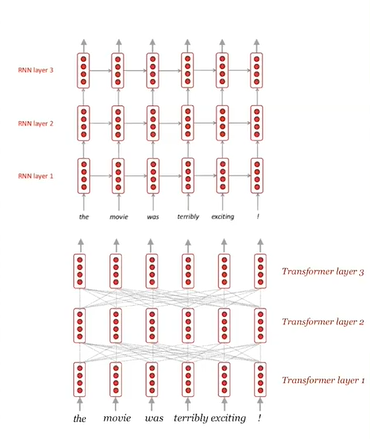

Every word is connected with every other word.

Transformers scale up well. Feed unlimitted training data. 

40:00

Q: Can hardware handle the quadratic load? When we have these long connections? 
A: Yes, that's a problem that it is quadratic, so we can't model very large text. It is active area of research. Consider k-nearset neighbor. So it's limitting max sequence length. Contrast with RNN, it can do longer but at training time it will backprop many time steps and it is expensive. Side note: But RNN can be effective for other tasks such as number of zeros and ones. In that can we can put into a context vector all needed info. And transformer will have it harder. 


*Decoding Language Model*

Now we can generate the probabilities but how we generate text? So we have many possible outputs, so we can't just take max. A lot of of context we can't just find max. Can't use dynamic programming. So a greedy decoding was introduced.

Greedy: take most likely word each time. But can't undo the decisions. No guarantee.

Beam search. Middle ground. Key idea: tracking k most probable. 

Example:
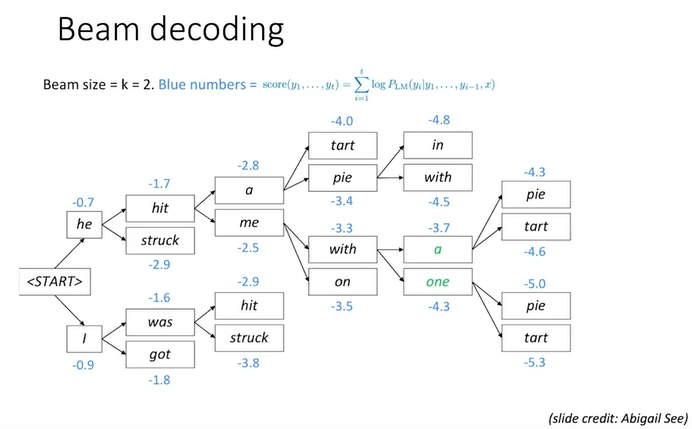

We're searching for highest. How far we search? Search to the end token. 

Q: Why empty translations?  A: (?)

Q: about why 'a' and 'one' in same color? A: don't know.


### Part B

0:45:32 

*Beam decoding*
- Searches the tree, traverses it till the end till k hypothesis found or till other limit (?).
- Select top one based on normalized probabilities. 

(TODO: review again)

55.30 Problem with hypothesis repeating the same output. 

Other problem is that sometimes we don't want the most probable but a sample from distribution. Consider a dialog modellliing; we don't want in it to get the most generic answer like 'oh, that's interesting, thanks' but more specific. 

Other problem is if we sample bad word we can go into a state we didn't train and it increases the chances of next bad word. 

So we do 'Top-k sampling'. From huggingface.co. This truncates distribution to top-k, normalize and sample. 

59.00

Evaluating text generation. It is easy to evaluate text model - we have text density. For generated text it is harder.


### Questions for part 1, till 1.00.00, seq-to-seq models

Section 1 and 2.

- What does natural language model consist of? What is input for such a model and output? 
- What's context encoder? 
- ConvNets approach. What are advantages and disadvantages?
- RNN approach. Pros and cons?
- Transformer
    - When Transformer was introduced and what's the paper name?
    - What is the general view of the encoder from the paper?
    - Transformer block diagram. What are sublayers?
    - Do Transformer share weights for every step?
    - Multi-head attention 
        - What's keys, values, queries? How they are used.
        - How it is parallelized?
        - How order is introduced?
    - Why Transformer is better compared to RNN or ConvNets?

Section 3. Tricks and facts

- What are important hyperparameters and methods? Why?
- What is the time complexitiy for Transformer?  What is made parallel? 
- How many parameters are used in recent models (2020)? 

Section 4. Decoding Language Model.

- How? We have those probabilities but how to generate text?
- Greedy approach
- Exhaustive search
- Beam search. 
    - Describe the algorithm. What does it optimize? What does it output? 





DL for NLP, continued, time: 1.00.00

*Seq-to-seq models*

Before that it was unconditional langauge models, i.e. there were no task. Uncoditioned lang. models can be used to generate random samples of language. 

And conditional lang models are used to generate text given some input. They are usefull. Example: given French translate, given doc generate summary, etc. This is called seq-2-seq models.

Encoder module reads inputs. Decoder module writes output word by word. 

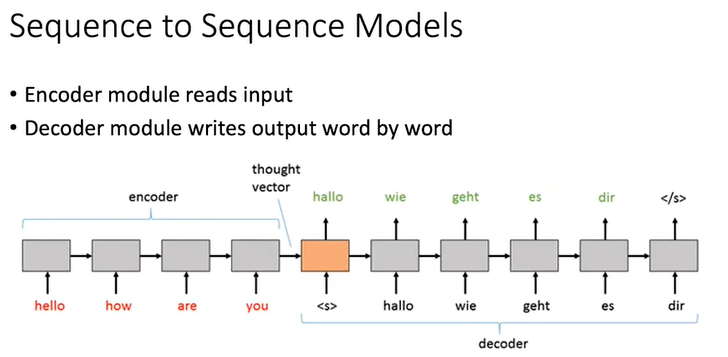

The above is bottleneck with this thought vector.

For Transformer:

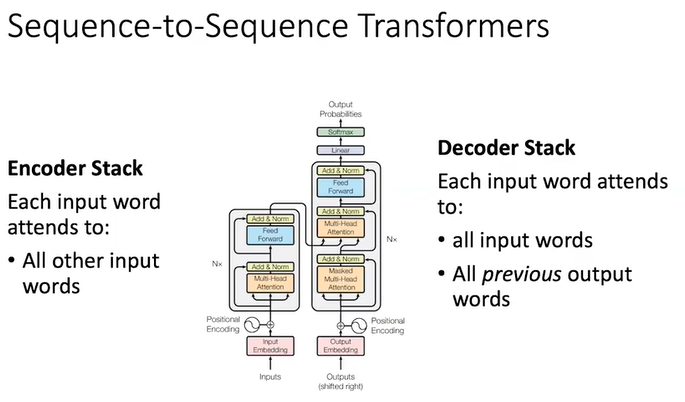

Encoder stack was described before. Every input word attends every other input words.
Decoder stack. Every input word attends all input words and every previous words. 

This improved substationally previous benchmark scores.

### Back-translation, word2vec and BERT's

1:03:31

They train the translation models on European parliament procceedings. It is parallel text of input and output. But can we use monolingual text for translation? Can use use non-labelled text? Then we can do without this labelled text, without input and output pairs. 

We do it with back-translation. First is do opposite - reverse translation. Given English output German. Then translate on billions of words. Finally, we do German to English model. ('Bitext' is a pair of sentences in Eng and in German.) This will be noisy translation as the text found in wild, in internet. Can't combine translation model with language model. 

Then do again. It is iterated backtranslation.

*Massively multilingual MT*. This giant NN that translate from all languages to all languages. THis gives improvements.

*Self-Supervised Learning*. How good if unlabeled text only? This looks like cake - unsupervised learning a lot and a bit of supervised learning - this is the best.

How unsupervised learning? 

word2vec

- They trained for word embeding, this is space representations for words. Intuition is that if words are close to each other then they relate to each other somehow. Like 'unicorn' in the example if missing. So they removed it and did encoding, and the label was the missing word.
- The  difference now is that they used all surrounding words not just those leading to the current one. 
- They found interensting structures in text. Like: 'King - Man + Woman = Queen'. 
- It was fast and scalable. 
- But those were independent of context. But in real lang they interconnected. 

How we add context? For that we would do unconditional lang model, i.e. it produces the next word. And then we would do supervised learning (icing on a cake) to predict other propertices - fine-tuning. This can be all kinds of tasks. 

It was GPT like trained. Nice: can do any task. Before that people did various architectures for tasks but now just one model, fine-tune for a task and it works.
Cons: it didn't consider right words. Want representations to depend on any future words.

ELMo. To fix that leftward only context. It did left-to-right and then right-to-left, then contacat. It was shallow representation.

BERT. It overcomes the limittation of ELMo. This made very difference in NLP. It masks some words and then fills in those blanks. 

Q: how to maintain for a particular task, when fine-tuning. A: can lost most info.

BERT. (continued).  It did very well. Better than humans. Implementation:
- 15% masked
- Scale up batch sizes
- Train on 1000 GPUs

So that made a model that was superhuman on question answering task. This is RoBERTa. 

Other variations from BERT:

- XLNet.  
- SpanBERT. Masking spans of words.
- ELECTRA. Substitude some and then predict what were substituded.
- ALBERT. 
- XLM. This run on many languages not only English. 

Limittations:
- They do only classification text. But problems are not classification of text. Modelling seq 2 seq e.g..

BART and T5. It was to train for seq to seq tasks. So it masked the text like BERT but didn't make representation instead feeding this corrupted text into decoder and make it restore the sentence. 
    - So corruption can be anything. 
    - Results great: for translation, other.
    
Open questions. NLP not solved.
- How to integrate world knowledge.
- How to model long docs? BERT-based used ~512 tokens.
- How to get one model that solves everything without fine-tuning?
- Fine-tune with less data?
- Are those models really understand lang?

Take aways:

- Big models beats explicitly modelling linguistic structure. 
- Lang model then fine-tuning
- Bidirectional is important.

Q: how we quantify understanding language? A: In practice: those models don't understand lang but in next week someone trains model and solves it on superhuman level. .. The classic example: 'the trophy doesn't suit the case because it is too small; the trophy doesn't suit the briefcase because it is too large' (too small / large refers to trophy or a briefcase). Years ago computes did about 60% and humans about 90-95% but now computers do ~90%. But it is more just learning language not common sense! Example : it can give unicorn four horns. This is because no one explicitely writes common sense knowledge. So there is limittations of how far you can learn using only language. 

Q: Work on grounded language? A: it is based on a dialog between two people trying to come up with agreement. What's good for you, for me, etc. Using language on purpose is better just seeing text in the wild.

Q: If we fine-tunie those large model. How we quantify what's forgoten. Interesting paper on this, T5 system with 15 bln params. It wasn't trained to answer questions but could do it scarily good. 




Questions

- Sequence to sequence models. What are they? Unconditional and conditional models. 
    - What encoder / decoder do? 
    - Encoder and decoder in the Transformer.
- Back-translation
    - How it was done?
    - Massively multilingual MT.
- Self-supervised learning. 
- word2vec. Unsupervised leaning. 
    - How they do it?
    - Pros and cons? Context.
- Supervised learning as an icing on a cake. 
- GPT. How? 
- ELMo. It's pros / cons.
- BERT. Pros / cons.
- Variations. 
- BART and T5. 
- Open questions in NLP
- (Q&A secion)
